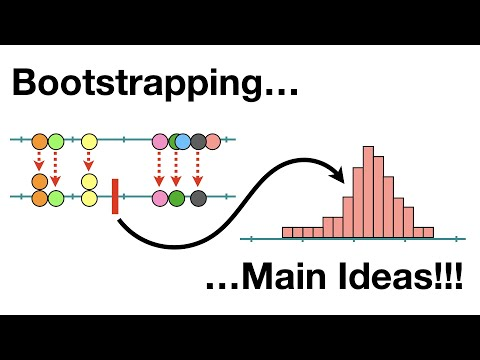

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Question #1: The standard deviation (square root of variance) depicts how spread out data values are around the mean. Whereas the standard error of mean is a measurement of the precision of the sample mean estimate. In other words, it is the variability in the means if you were to obtain samples from one population.

Question #2: First you would obtain the mean of the sample data, then you would calculate the standard error of the mean (standard deviation / root of sample size), then multiply SEM by 1.96 (z-score for 95%). This will give you the interval, final answer is written "mean +/- 1.96 * SEM".

Question #3: Bootstrap the data set and collect the bootstrapped means. Arrange the means in ascending order (least to greatest), then use the np.quantile() function. This function finds the lower and upper bounds of the interval (2.5, 97.5). You can be 95% confident the true population mean is within this 95% interval. 

In [1]:
import numpy as np

# 1. Make up a sample to work with (e.g., a small dataset of numbers)
sample = np.array([12, 15, 14, 10, 9, 13, 16, 14, 18, 17])

# 2. Set the number of bootstrap resamples
n_bootstrap_samples = 10000

# 3. Define a function to generate bootstrapped confidence intervals for a statistic
def bootstrap_ci(sample, stat_function, n_bootstrap_samples=10000, ci=0.95):
    # Create an empty array to store the bootstrapped statistics
    bootstrap_stats = np.empty(n_bootstrap_samples)
    
    # Generate the bootstrapped samples and calculate the statistic for each
    for i in range(n_bootstrap_samples):
        # Resample from the original sample (with replacement) and calculate the statistic
        boot_sample = np.random.choice(sample, size=len(sample), replace=True)
        bootstrap_stats[i] = stat_function(boot_sample)
    
    # Sort the bootstrapped statistics
    bootstrap_stats.sort()
    
    # Compute the lower and upper percentiles for the confidence interval
    lower_percentile = (1 - ci) / 2
    upper_percentile = 1 - lower_percentile
    
    # Use np.quantile to get the confidence interval bounds
    lower_bound = np.quantile(bootstrap_stats, lower_percentile)
    upper_bound = np.quantile(bootstrap_stats, upper_percentile)
    
    return lower_bound, upper_bound

# 4. Calculate a 95% confidence interval for the population mean
mean_ci = bootstrap_ci(sample, np.mean)

print("95% Bootstrapped CI for the mean:", mean_ci)

# 5. To calculate the CI for a different statistic (e.g., median), change np.mean to np.median:
median_ci = bootstrap_ci(sample, np.median)

print("95% Bootstrapped CI for the median:", median_ci)

95% Bootstrapped CI for the mean: (12.1, 15.4)
95% Bootstrapped CI for the median: (12.0, 16.0)


Question #5: Population parameter, unlike sample statistic, is the true value of a charactersitic of a population, where as the sample statistic is the characteristic of a sample of that population. The difference is that the population parameter is usually very difficult to obtain so a sample statistic is used to estimate the value.

Question #6:

What is the process of bootstrapping?

Instead of trying to obtain data many many times for accurate statistics, instead we use bootstrapping to estimate these values. You randomly sample (with replacement) the existing sample to make a new one, record the information, then repeat until you have enough data points.

What is the main purpose of bootstrapping?

To save time/energy/costs on repeating an experiment/process. Instead, bootstrapping is a more efficient though approximate method.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

you bootstrap the sample to obtain a bootstrapped mean. Then you can follow the steps in the previous answers to create a 95% confidence interval with the bootstrapped data to determine whether or not your guess is plausable.

Question #7: We fail to reject the null hypothesis because the confidence interval is not exact, it's an approximation. Therefore, if 0 is within the interval, it's still possible that 0 is the true population mean. If 0 isn't inside the confidence interval whatsoever, then we would reject the null hypothesis as we are 95% confident that 0 isn't the true population mean.

Question #8:

Null Hypothesis (H₀): The vaccine has no effect on health scores. This means the change in health scores (final - initial) is not significantly different from zero.

Alternative Hypothesis (HA): The vaccine has a positive effect on health scores, meaning the final health scores are higher on average than the initial scores.

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore  HealthChange
0          1   45      M                  84                86             2
1          2   34      F                  78                86             8
2          3   29      M                  83                80            -3
3          4   52      F                  81                86             5
4          5   37      M                  81                84             3
5          6   41      F                  80                86             6
6          7   33      M                  79                86             7
7          8   48      F                  85                82            -3
8          9   26      M                  76                83             7
9         10   39      F                  83                84             1


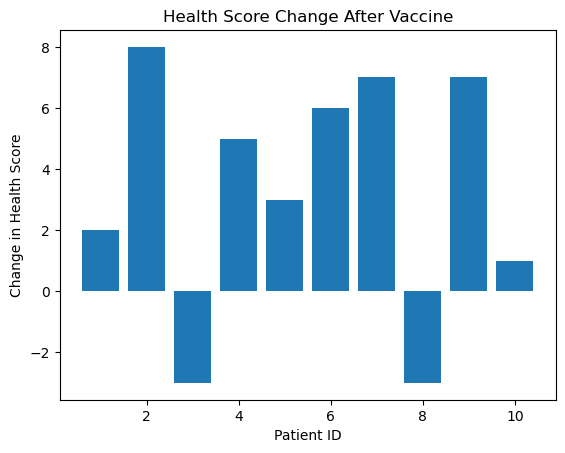

95% Bootstrapped CI for health score change: (0.90, 5.60)


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataset
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate the change in health scores
data['HealthChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Display the data to confirm everything is loaded correctly
print(data)

# Visualize the change in health scores
plt.bar(data['PatientID'], data['HealthChange'])
plt.xlabel('Patient ID')
plt.ylabel('Change in Health Score')
plt.title('Health Score Change After Vaccine')
plt.show()

# Define the bootstrap function to compute the confidence interval
def bootstrap_ci(data, n_bootstrap_samples=10000, ci=0.95):
    np.random.seed(42)
    bootstrap_means = np.empty(n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(boot_sample)
    
    lower_bound = np.percentile(bootstrap_means, (1-ci)/2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + ci)/2 * 100)
    
    return lower_bound, upper_bound

# Apply bootstrapping to health score changes
health_changes = data['HealthChange'].values
lower, upper = bootstrap_ci(health_changes)

# Display the confidence interval
print(f"95% Bootstrapped CI for health score change: ({lower:.2f}, {upper:.2f})")

First we subtract final health score from initial health score to get our data points. Then the program generates 10,000 bootstrap resamples of the change in health scores (with replacement) and calculate the mean of each sample. From the bootstrapped means, we compute the 95% confidence interval by finding the 2.5th and 97.5th percentiles.

Conclusion:

The 95% bootstrapped confidence interval for the change in health scores is (0.90, 5.60). This interval does not contain 0, which means we can reject the null hypothesis of "no effect." In other words, there is strong evidence that the vaccine has a positive effect on health scores.

Thus, the data supports the conclusion that the vaccine is effective in improving the health of patients who receive it.

Question #9: Yes

Link to GPT Conversation: https://chatgpt.com/share/67049ab1-66b8-8011-84a9-7d4fbc71008b